# STEP3. 데이터 시각화 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
import os 

os.getcwd() #excel파일 불러오기위한 팡링 위치 확인 

'C:\\Users\\jangs'

In [3]:
# 파일 불러오기 
test_data = pd.read_excel('포항시_분실물데이터_project.xlsx')

In [4]:
test_data

,고유번호,등록날짜,분실장소,lost_place,type_stuff,type_public
0,L2023081500000396,2023-08-15,남구 대이동 대구은행 뒤 포항정육점 근처,기타_공공기관,쇼핑백,yes
1,L2023081400000444,2023-08-13,포항방향 외동휴게소,기타_공공기관,지갑,yes
2,L2023081300000407,2023-08-12,포항영일대 홍이이자카야 스타벅스사이,임의지역,귀금속,no
3,L2023081200000690,2023-08-12,포항시 영일대,임의지역,휴대폰,no
4,L2023081100000326,2023-08-09,포항영일대해수욕장 근처,임의지역,지갑,no
...,...,...,...,...,...,...
285,L2023020200000428,2022-10-15,포항운전면허시험장 앞 노상,기타_공공기관,자동차,yes
286,L2023043000000193,2022-10-07,포항시내 오락실(실내 야구.사격.노래),임의지역,지갑,no
287,L2023040600000462,2022-10-01,"포항시 남구 상공로270, 현대오일뱅크 앞",임의지역,자동차,no
288,L2023041700000876,2022-09-10,포항시 남구 양포 인근 불상지,임의지역,자동차,no


In [5]:
# 중복되는 값 확인
#조건식을 활용하여 데이터 선별 : 중복 값 없음 
result = test_data.groupby('고유번호').filter(lambda group: len(group) > 1)
result

,고유번호,등록날짜,분실장소,lost_place,type_stuff,type_public


In [6]:
# 결측치 확인 
test_data.isna().sum()

고유번호           0
등록날짜           0
분실장소           0
lost_place     0
type_stuff     0
type_public    0
dtype: int64

# STEP3. 데이터 시각화 

# 데이터 인코딩

In [7]:
# 데이터 자료형 확인 
test_data.dtypes

고유번호           object
등록날짜           object
분실장소           object
lost_place     object
type_stuff     object
type_public    object
dtype: object

# 1)'고유번호' -> index로 전환 
# 2)'등록날짜' -> '-'split하여 합치기 
# 3)'분실장소' -> type_public : (yes:1, no:0)
# 4)'type_stuff' -> 유형 수치화 

# 1)'고유번호' -> index로 전환 

In [8]:
test_data.set_index('고유번호', inplace=True)

In [ ]:
test_data

# 2)'등록날짜' -> '-'split하여 합치기 

In [10]:
#등록 날짜 나누기 
date = test_data['등록날짜']

for i in range(len(test_data)):
    date[i] = date[i].split('-')
date

고유번호
L2023081500000396    [2023, 08, 15]
L2023081400000444    [2023, 08, 13]
L2023081300000407    [2023, 08, 12]
L2023081200000690    [2023, 08, 12]
L2023081100000326    [2023, 08, 09]
                          ...      
L2023020200000428    [2022, 10, 15]
L2023043000000193    [2022, 10, 07]
L2023040600000462    [2022, 10, 01]
L2023041700000876    [2022, 09, 10]
L2023020200000425    [2022, 04, 01]
Name: 등록날짜, Length: 290, dtype: object

In [11]:
#나눈일자 합치기 (.join)
for i in range(len(test_data)):
    date[i] = ''.join(date[i])
date

고유번호
L2023081500000396    20230815
L2023081400000444    20230813
L2023081300000407    20230812
L2023081200000690    20230812
L2023081100000326    20230809
                       ...   
L2023020200000428    20221015
L2023043000000193    20221007
L2023040600000462    20221001
L2023041700000876    20220910
L2023020200000425    20220401
Name: 등록날짜, Length: 290, dtype: object

In [12]:
# 자료형 변환 (object->int)
new_date = []
for i in range(len(test_data)):
     new_date.append(int(str(date[i])))
len(new_date)

290

In [13]:
test_data['register_date'] = new_date

In [14]:
test_data.dtypes

등록날짜             object
분실장소             object
lost_place       object
type_stuff       object
type_public      object
register_date     int64
dtype: object

In [15]:
test_data.drop(['등록날짜'],axis=1,inplace=True)

# 3)'분실장소' -> type_public : (yes:1, no:0)

In [16]:
#인코딩 
test_data.type_public.replace({'yes': 1, 'no': 0}, inplace=True) 

In [17]:
test_data

,분실장소,lost_place,type_stuff,type_public,register_date
고유번호,,,,,
L2023081500000396,남구 대이동 대구은행 뒤 포항정육점 근처,기타_공공기관,쇼핑백,1,20230815
L2023081400000444,포항방향 외동휴게소,기타_공공기관,지갑,1,20230813
L2023081300000407,포항영일대 홍이이자카야 스타벅스사이,임의지역,귀금속,0,20230812
L2023081200000690,포항시 영일대,임의지역,휴대폰,0,20230812
L2023081100000326,포항영일대해수욕장 근처,임의지역,지갑,0,20230809
...,...,...,...,...,...
L2023020200000428,포항운전면허시험장 앞 노상,기타_공공기관,자동차,1,20221015
L2023043000000193,포항시내 오락실(실내 야구.사격.노래),임의지역,지갑,0,20221007
L2023040600000462,"포항시 남구 상공로270, 현대오일뱅크 앞",임의지역,자동차,0,20221001


In [18]:
test_data.dtypes

분실장소             object
lost_place       object
type_stuff       object
type_public       int64
register_date     int64
dtype: object

# 3 -1) 분실장소(기차:1, 버스:2, 택시:3, 기타 공공기관:4 , 확인 불가지역:0)

In [19]:
# 분실장소 encoding을 위해 단일화 (중복되는 데이터 삭제)
test_data.drop(['분실장소'], axis=1, inplace=True)

In [20]:
test_data.groupby('lost_place').count() # encoding 변수의 갯수 확인 

,type_stuff,type_public,register_date
lost_place,,,
기차,10,10,10
기타_공공기관,29,29,29
버스,33,33,33
임의지역,213,213,213
택시,5,5,5


In [21]:
#인코딩 
test_data.lost_place.replace({'기차': 1,'버스': 2,'택시': 3,'기타_공공기관': 4, '임의지역': 0}, inplace=True) 

# 3 -2) 분실물품 종류

In [22]:
test_data.groupby('type_stuff').count() # encoding 변수의 갯수 확인 

,lost_place,type_public,register_date
type_stuff,,,
가방,15,15,15
귀금속,12,12,12
기타물품,6,6,6
산업용품,1,1,1
서류,6,6,6
쇼핑백,1,1,1
스포츠용품,5,5,5
악기,1,1,1
유가증권,3,3,3


In [23]:
# object type의 자료형에 대해서 정수형으로 변환
from sklearn.preprocessing import LabelEncoder

# LabelEncoder 인스턴스 생성
label_encoder = LabelEncoder()

# 모든 오브젝트 타입 열에 대해 레이블 인코딩 수행
for column in test_data.select_dtypes(include=['object']).columns:
    test_data[column] = label_encoder.fit_transform(test_data[column])

print(test_data)

                   lost_place  type_stuff  type_public  register_date
고유번호                                                                 
L2023081500000396           4           5            1       20230815
L2023081400000444           4          14            1       20230813
L2023081300000407           0           1            0       20230812
L2023081200000690           0          18            0       20230812
L2023081100000326           0          14            0       20230809
...                       ...         ...          ...            ...
L2023020200000428           4          11            1       20221015
L2023043000000193           0          14            0       20221007
L2023040600000462           0          11            0       20221001
L2023041700000876           0          11            0       20220910
L2023020200000425           0          11            0       20220401

[290 rows x 4 columns]


In [24]:
test_data.dtypes

lost_place       int64
type_stuff       int32
type_public      int64
register_date    int64
dtype: object

In [25]:
test_data.groupby('type_stuff').count() 

,lost_place,type_public,register_date
type_stuff,,,
0,15,15,15
1,12,12,12
2,6,6,6
3,1,1,1
4,6,6,6
5,1,1,1
6,5,5,5
7,1,1,1
8,3,3,3


In [28]:
''' 
- encoding된 값 -
'가방' : 0, 	
'귀금속' : 1,	
'기타물품' : 2,	
'산업용품' :3,	
'서류' :4,	
'쇼핑백' :5,	
'스포츠용품':6,	
'악기':7,		
'유가증권':8,		
'유류품':9,		
'의류':10,		
'자동차':11,		
'전자기기':12,		
'증명서':13,		
'지갑':14,		
'카드':15,		
'컴퓨터':16,		
'현금':17,		
'휴대폰':':18	

'''

" \n- encoding된 값 -\n'가방' : 0, \t\n'귀금속' : 1,\t\n'기타물품' : 2,\t\n'산업용품' :3,\t\n'서류' :4,\t\n'쇼핑백' :5,\t\n'스포츠용품':6,\t\n'악기':7,\t\t\n'유가증권':8,\t\t\n'유류품':9,\t\t\n'의류':10,\t\t\n'자동차':11,\t\t\n'전자기기':12,\t\t\n'증명서':13,\t\t\n'지갑':14,\t\t\n'카드':15,\t\t\n'컴퓨터':16,\t\t\n'현금':17,\t\t\n'휴대폰':':18\t\n\n"

In [29]:
test_data.isna().sum()
test_data.head()

,lost_place,type_stuff,type_public,register_date
고유번호,,,,
L2023081500000396,4,5,1,20230815
L2023081400000444,4,14,1,20230813
L2023081300000407,0,1,0,20230812
L2023081200000690,0,18,0,20230812
L2023081100000326,0,14,0,20230809


In [30]:
test_data.describe() 

,lost_place,type_stuff,type_public,register_date
count,290.000000,290.000000,290.000000,2.900000e+02
mean,0.713793,11.717241,0.265517,2.022951e+07
std,1.319595,4.934454,0.442372,2.804474e+03
min,0.000000,0.000000,0.000000,2.022040e+07
25%,0.000000,11.000000,0.000000,2.023021e+07
50%,0.000000,13.000000,0.000000,2.023041e+07
75%,1.000000,14.000000,1.000000,2.023061e+07
max,4.000000,18.000000,1.000000,2.023082e+07


# 데이터 시각화

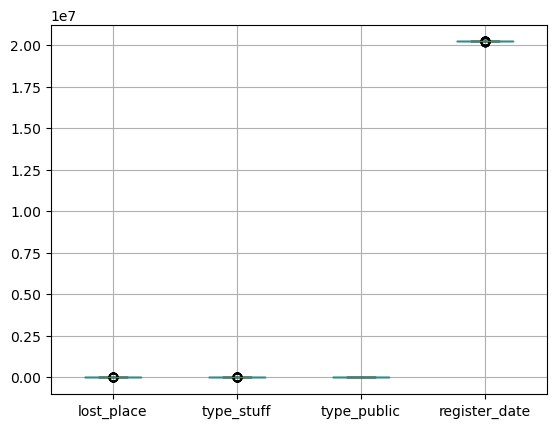

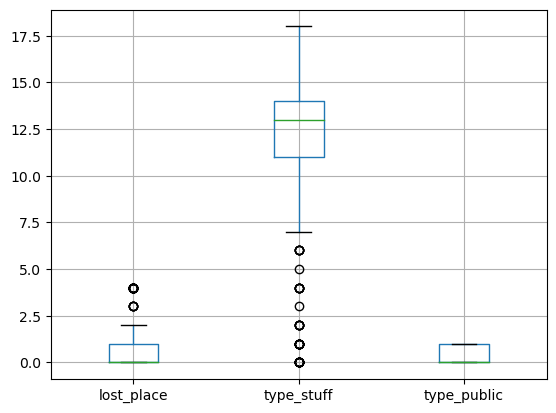

In [31]:
#데이터 scailing 필요여부 판단 >> 필요

# 변수들간의 관계 : "register_date" : 다른 변수들과 비교했을때 크기가 너무크게 설정되어 있어 변수들간의 관게 확인 어렵
test_data.boxplot()
plt.show()

# "register_date"을 제외한 변수들간의 관계확인
info_date = test_data.drop('register_date',axis=1)
info_date.boxplot()
plt.show()

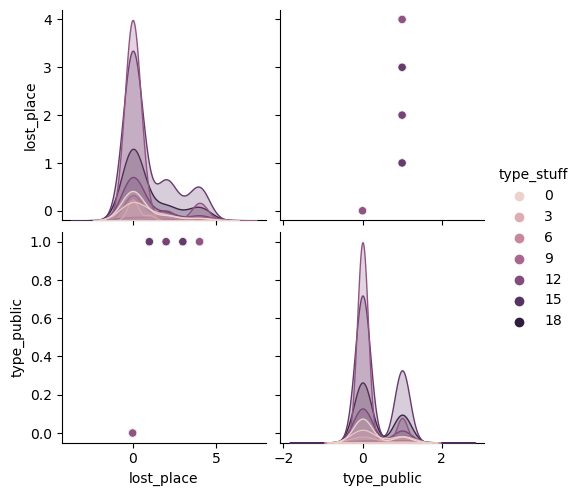

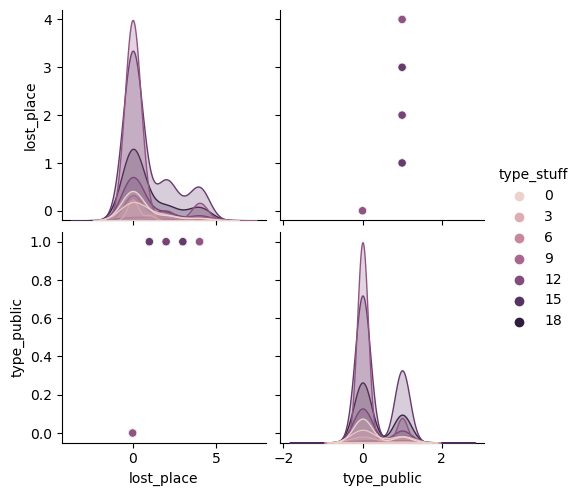

In [32]:
#변수들 사이의 상관관게 : importance 예측
sns.pairplot(info_date, hue='type_stuff') #'물품유형'을 기준으로 '대중교통시설여부', '공공장소<->임의지역' 변수들간의 관계
plt.show()

# 변수들간의 상관관계를 확인결과 


>> 데이터 간의 분류가 명확하계 범주화 되는 'type_public'변수 : y 설정 유효해 보임

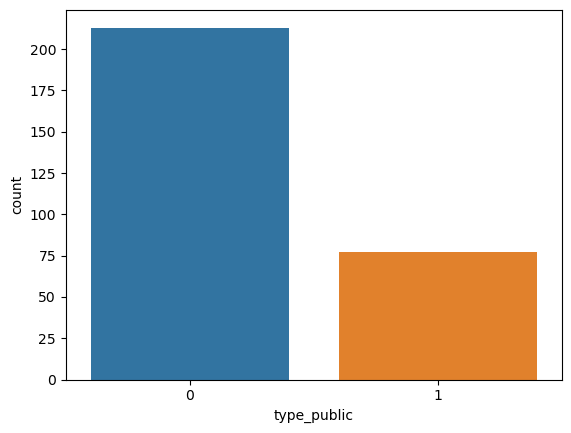

In [33]:
# resample 여부 확인 >> resample필요 : oversample 이용 >> under sample이용하였을때 x 특정 물품 통게에서 제외될수있으므로 
sns.countplot(x= test_data.type_public) #x/ version에 의해서 x축 지정해야 분리된 값이 출력
plt.show()

# 변수 분할 (x: 독립, y:종속 split) 

In [34]:
y = test_data.type_public
x = test_data.drop('type_public', axis=1)

In [35]:
x.head()

,lost_place,type_stuff,register_date
고유번호,,,
L2023081500000396,4,5,20230815
L2023081400000444,4,14,20230813
L2023081300000407,0,1,20230812
L2023081200000690,0,18,20230812
L2023081100000326,0,14,20230809


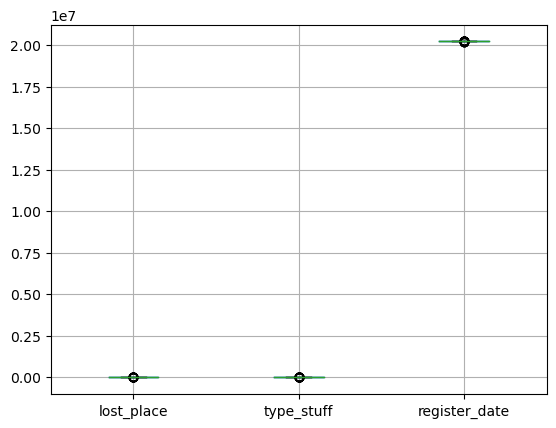

In [36]:
#X값 스케일링 MinMaxScaler
x.boxplot() #스케일링전에 범주확인 
plt.show()

# scailing 

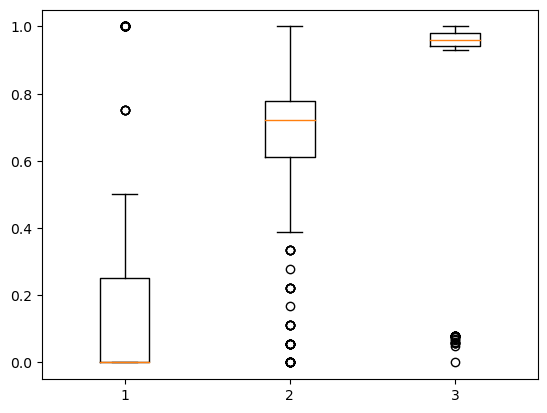

In [37]:
# x값 스케일링 이후 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

plt.boxplot(x_scaled)
plt.show()

# 학습 데이터와 검증데이터 분할

In [38]:
#•Train and test split 훈련, 테스트데이터 분리
from sklearn.model_selection import train_test_split
x_train, x_test , y_train , y_test = train_test_split(x_scaled, y, test_size=.2, random_state=3)  #autocompletion; Jupiter에서는 'tab'

In [39]:
x_train

array([[0.        , 0.77777778, 0.98031496],
       [0.        , 0.61111111, 0.98079508],
       [0.        , 1.        , 0.99116574],
       [0.        , 0.44444444, 0.97138467],
       [0.        , 0.61111111, 0.960918  ],
       [0.        , 0.61111111, 0.97100058],
       [0.        , 0.72222222, 0.93143845],
       [0.        , 0.11111111, 0.95275591],
       [0.        , 0.05555556, 0.9535241 ],
       [0.        , 1.        , 0.95131554],
       [0.        , 0.77777778, 0.98972537],
       [0.        , 0.22222222, 0.93259074],
       [0.        , 0.77777778, 0.96207029],
       [0.        , 0.77777778, 0.95169964],
       [0.        , 0.61111111, 0.99865566],
       [0.        , 0.22222222, 0.97042443],
       [0.        , 0.        , 0.96984828],
       [1.        , 0.77777778, 0.95294795],
       [0.5       , 0.72222222, 0.07826003],
       [0.        , 0.77777778, 0.9535241 ],
       [0.        , 0.61111111, 0.97157672],
       [0.5       , 0.77777778, 0.98137123],
       [0.

# Resample 

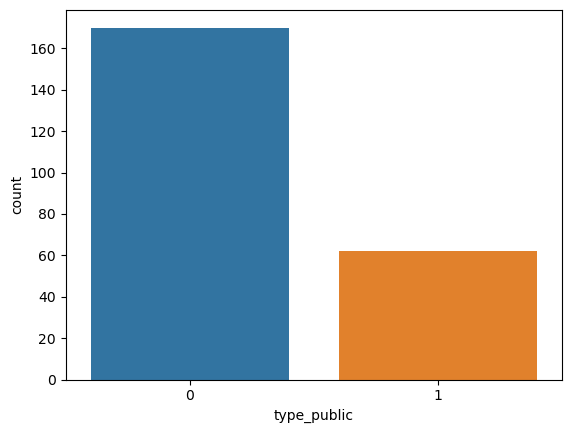

In [40]:
# resample 
sns.countplot(x= y_train) #x/ version에 의해서 x축 지정해야 분리된 값이 출력
plt.show()

In [41]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_smote, y_smote = smote.fit_resample(x_train, y_train)

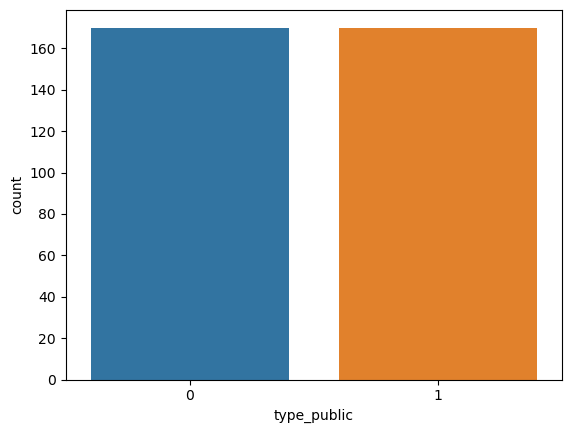

In [42]:
sns.countplot(x=y_smote)
plt.show()

# STEP4. 모델 학습 (범주 데이터; logistic_regression, Decision_tree, RF)

In [43]:
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

#모델 학습 : logistic_regression
#log_model = RandomForestClassifier() #학습에 랜덤한 부분이 있음? log_model = LogisticRegression(random_state=1) 고정? 
#log_model.fit(x_smote, y_smote)

In [44]:
def evaluate_model(model, x_train, y_train, x_test, y_test):
    model.fit(x_train, y_train) #훈련데이터로 학습  
    score = model.score(x_test, y_test) # 모델평가 (r2_score)
    print('test_score=', score)
    cv = cross_val_score(model, x_test, y_test, cv=10, scoring='accuracy') 
    print(cv)
    return score, cv

In [45]:
# list로 score, cv_score 저장 
score_lst = []
cv_lst = []

In [46]:
# 회귀분석
lr_model = LogisticRegression(random_state=3)
lr_score, lr_cv = evaluate_model(lr_model, x_train, y_train, x_test, y_test)
lr_score, lr_cv

score_lst.append(lr_score)
cv_lst.append(lr_cv)

test_score= 0.9827586206896551
[1.         0.83333333 1.         0.66666667 0.83333333 0.83333333
 0.66666667 0.83333333 1.         1.        ]


In [47]:
#의사결정 트리
dt_model = DecisionTreeClassifier(random_state=3)
dt_score, dt_cv = evaluate_model(dt_model, x_train, y_train, x_test, y_test)
dt_score, dt_cv

score_lst.append(dt_score)
cv_lst.append(dt_cv)

test_score= 1.0
[1.         1.         1.         0.83333333 1.         1.
 1.         1.         1.         1.        ]


In [48]:
#랜덤 포레스트
rf_model = RandomForestClassifier(random_state=3)
rf_score, rf_cv = evaluate_model(rf_model, x_train, y_train, x_test, y_test)
rf_score, rf_cv

score_lst.append(rf_score)
cv_lst.append(rf_cv)

test_score= 1.0
[1.         1.         1.         0.83333333 1.         1.
 1.         1.         1.         1.        ]


# STEP5. 모델 정확도 검증 

In [49]:
# score 평가 
# 결정계수 테이블 
score_df = pd.DataFrame(score_lst)
score_df.index = ['LR', 'DT', 'RF']
score_df.columns = ['score']

In [50]:
#평균, 표준편차 테이블로 비교
cv_df = pd.DataFrame(cv_lst, index=score_df.index).T
cv_summary = pd.DataFrame({'mean': cv_df.mean(),
                             'std': cv_df.std()})

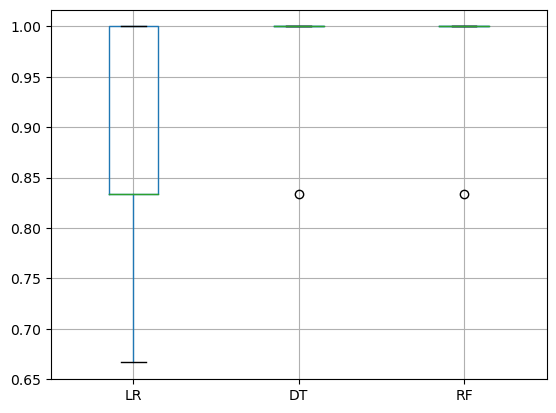

In [51]:
cv_df.boxplot()
plt.show()

In [52]:
score_df

,score
LR,0.982759
DT,1.000000
RF,1.000000


In [53]:
cv_summary # 정확도; RF,DT 모델이 높음 

,mean,std
LR,0.866667,0.131468
DT,0.983333,0.052705
RF,0.983333,0.052705


# 모델 결과 도출 변수별 기여도

In [54]:
# 변수중 답변 영향에 큰 영향을 준 요인 : 'lost_place' 분실장소 88%
rf_model.feature_importances_

array([0.85894306, 0.05432679, 0.08673015])

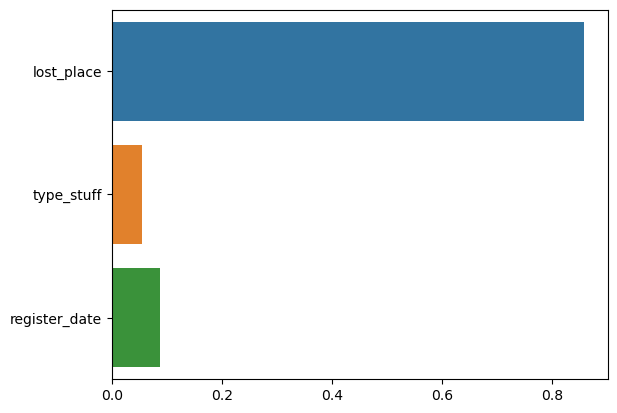

In [55]:
sns.barplot(x=rf_model.feature_importances_, y=x.columns) #숫자가 적은 변수가 중요한 변수
plt.show()

# STEP6. 최종 학습 모델 선택및 테스트 데이터 실험 

In [56]:
#predict

pred = rf_model.predict(x_test)

In [57]:
pred_df = pd.DataFrame({'Predict_result': pred, 
                       'Real_data': y_test})

# 예측분포 확인 
pred_df.groupby('Predict_result').count()

,Real_data
Predict_result,
0,43
1,15


In [58]:
pred.mean() #분류 문제이므로 'mean()'을 통해서 '공공기관_분실' 확률 비교가능

0.25862068965517243

In [59]:
y_test.mean() #실제모델에서 분포 확인 방법

0.25862068965517243

In [60]:
# 예측분포 확인 
pred_df.groupby('Real_data').count()

,Predict_result
Real_data,
0,43
1,15


# 데이터 검증 방법

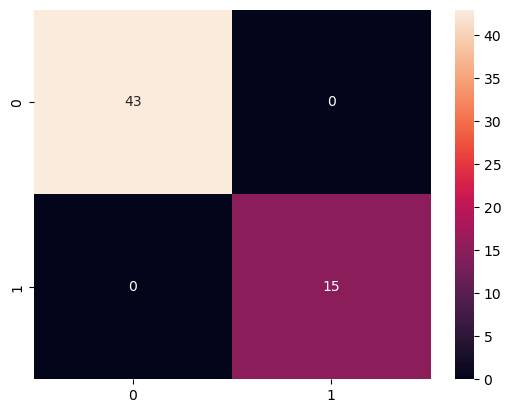

In [61]:
from sklearn.metrics import confusion_matrix, classification_report

#confussion_matrix
rf_model = RandomForestClassifier()
rf_model.fit(x_smote, y_smote)
y_pred = rf_model.predict(x_test)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.show()

In [62]:
#분류 리포트 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00        15

    accuracy                           1.00        58
   macro avg       1.00      1.00      1.00        58
weighted avg       1.00      1.00      1.00        58



# Fine_tuning 

In [63]:
# fine tuning
from sklearn.model_selection import GridSearchCV

params = { 'n_estimators' : [10, 100],
           'max_depth' : [6, 8, 10, 12],
           'min_samples_leaf' : [8, 12, 18],
           'min_samples_split' : [8, 16, 20]
            }

# GridSearchCV 수행
rf = RandomForestClassifier(random_state = 0, n_jobs = -1)
grid_cv = GridSearchCV(rf, param_grid = params, cv = 3, n_jobs = -1)
grid_cv.fit(x_train, y_train)

print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:  {'max_depth': 6, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 10}
최고 예측 정확도: 1.0000


In [64]:
# 추천된 파라미터로 재학습
gb_model = RandomForestClassifier(
max_depth = 6, min_samples_leaf = 8, min_samples_split = 8, n_estimators = 10
    )
gb_model.fit(x_smote, y_smote)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, min_samples_split=8,
                       n_estimators=10)

In [65]:
# 재학습시 정확도
gb_score = gb_model.score(x_test, y_test) 
gb_score

1.0

In [66]:
# 모델 이용방법; 
pred = gb_model.predict(x_test)
pred[1]

0

# 모델 학습시 활용하는 변수를 최소화 시킨 방법으로 학습 비교

# 모델 단순화 : 모델 활용한 서비스 제작 위해서

In [67]:
y = test_data.type_public
x = test_data.lost_place

In [68]:
type(x)
x[0]

4

In [69]:
#x의 1차원을 2차원으로 변환
x_scaled = scaler.fit_transform(x.values.reshape(-1, 1))

In [70]:
x_scaled

array([[1.  ],
       [1.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.5 ],
       [0.  ],
       [0.  ],
       [0.25],
       [0.  ],
       [0.  ],
       [0.5 ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.75],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.5 ],
       [0.75],
       [0.  ],
       [0.5 ],
       [0.  ],
       [1.  ],
       [0.  ],
       [0.  ],
       [1.  ],
       [0.  ],
       [1.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.5 ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.5 ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.75],
       [0.  ],
       [0.  ],
       [0.5 ],
       [0.  ],
       [0.  ],
       [0.5 ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.5 ],
       [1.  ],
       [0.

In [71]:
x_train, x_test , y_train , y_test = train_test_split(x_scaled, y, test_size=.2, random_state=3)  #autocompletion; Jupiter에서는 'tab'

In [72]:
x_train[0]

array([0.])

In [73]:
smote = SMOTE()
x_smote, y_smote = smote.fit_resample(x_train, y_train)

In [74]:
# list로 score, cv_score 저장 
score_lst_small = []
cv_lst_small = []

In [75]:
# 회귀분석
lr_model = LogisticRegression(random_state=3)
lr_score, lr_cv = evaluate_model(lr_model, x_train, y_train, x_test, y_test)
lr_score, lr_cv

score_lst_small.append(lr_score)
cv_lst_small.append(lr_cv)

test_score= 0.9827586206896551
[1.         0.83333333 1.         0.66666667 0.83333333 0.83333333
 0.66666667 0.83333333 1.         1.        ]


In [76]:
#의사결정 트리
dt_model = DecisionTreeClassifier(random_state=3)
dt_score, dt_cv = evaluate_model(dt_model, x_train, y_train, x_test, y_test)
dt_score, dt_cv

score_lst_small.append(dt_score)
cv_lst_small.append(dt_cv)

test_score= 1.0
[1.         1.         1.         0.83333333 1.         1.
 1.         1.         1.         1.        ]


In [77]:
#랜덤 포레스트
rf_model = RandomForestClassifier(random_state=3)
rf_score, rf_cv = evaluate_model(rf_model, x_train, y_train, x_test, y_test)
rf_score, rf_cv

score_lst_small.append(rf_score)
cv_lst_small.append(rf_cv)

test_score= 1.0
[1.         1.         1.         0.83333333 1.         1.
 1.         1.         1.         1.        ]


In [78]:
#평균, 표준편차 테이블로 비교
cv_df = pd.DataFrame(cv_lst_small, index=score_df.index).T
cv_summary = pd.DataFrame({'mean': cv_df.mean(),
                             'std': cv_df.std()})

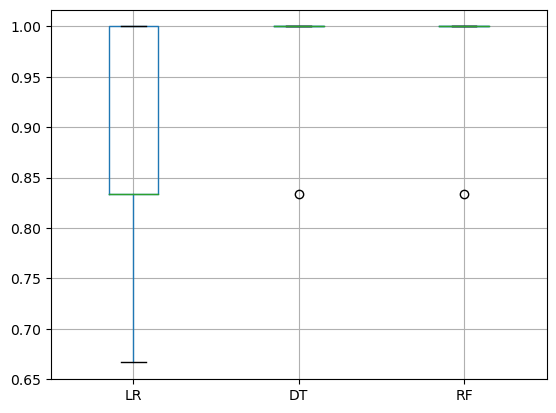

In [79]:
cv_df.boxplot()
plt.show()

In [80]:
cv_summary

,mean,std
LR,0.866667,0.131468
DT,0.983333,0.052705
RF,0.983333,0.052705


In [81]:
score_lst_small

[0.9827586206896551, 1.0, 1.0]

In [82]:
x_test

array([[0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [1.  ],
       [0.5 ],
       [1.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.5 ],
       [0.25],
       [0.  ],
       [0.5 ],
       [1.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.5 ],
       [0.  ],
       [1.  ],
       [0.  ],
       [0.5 ],
       [0.5 ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.5 ],
       [1.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [1.  ],
       [1.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ]])

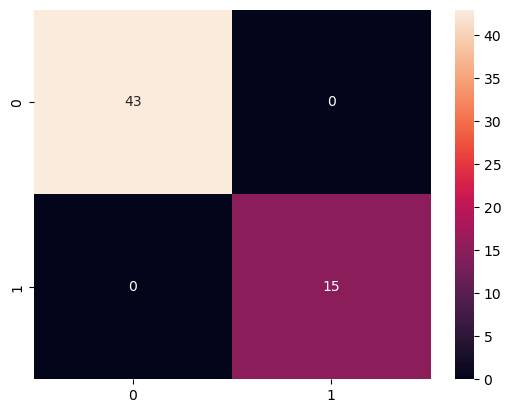

In [83]:
from sklearn.metrics import confusion_matrix, classification_report

#confussion_matrix
rf_model = RandomForestClassifier()
rf_model.fit(x_smote, y_smote)
y_pred = rf_model.predict(x_test)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.show()

In [84]:
# fine tuning
from sklearn.model_selection import GridSearchCV

params = { 'n_estimators' : [10, 100],
           'max_depth' : [6, 8, 10, 12],
           'min_samples_leaf' : [8, 12, 18],
           'min_samples_split' : [8, 16, 20]
            }

# GridSearchCV 수행
rf = RandomForestClassifier(random_state = 0, n_jobs = -1)
grid_cv = GridSearchCV(rf, param_grid = params, cv = 3, n_jobs = -1)
grid_cv.fit(x_train, y_train)

print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:  {'max_depth': 6, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 10}
최고 예측 정확도: 1.0000


In [85]:
# 추천된 파라미터로 재학습
final_model = RandomForestClassifier(
max_depth = 6, min_samples_leaf = 8, min_samples_split = 8, n_estimators = 10
    )
final_model.fit(x_smote, y_smote)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, min_samples_split=8,
                       n_estimators=10)

In [86]:
# 재학습시 정확도
final_score = final_model.score(x_test, y_test) 
final_score

1.0

In [87]:
x_smote

array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [1.        ],
       [0.5       ],
       [0.        ],
       [0.        ],
       [0.5       ],
       [0.75      ],
       [0.        ],
       [1.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.5       ],
       [1.        ],
       [0.5       ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.25      ],
       [0.        ],
       [0.        ],
       [1.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.   

In [88]:
# 결론; 변수 단일 학습 모델 성능 유사; 

In [89]:
data = {'Input': [3, 4, 1, 0]}
input_df = pd.DataFrame(data)

input_df

,Input
0,3
1,4
2,1
3,0


In [90]:
x_input = input_df.Input
type(x_input)

pandas.core.series.Series

In [91]:
#x의 1차원을 2차원으로 변환
x_input_scaled = scaler.fit_transform(x_input.values.reshape(-1, 1)) #비교군이 있어야함

In [92]:
x_input_scaled[0]

array([0.75])

In [93]:
final_model.predict(x_input_scaled)[0] # 가장 마지막 값을 input으로 두기

1

# (extra) 모델을 활용한 조회링크 공유하는 서비스

In [94]:
from tkinter import *

In [100]:
win = Tk()
win.geometry("300x100") #입력 창의 크기 
win.option_add("*Font","궁서 20") #입력 칭의 font

#문자입력 
ent = Entry(win) 
ent.pack()



# 창이 계속 실행되어야 하며 해당 함수 공간에서만 유효;
def ent_p():
    input_value = ent.get() #입력한 문자열 추출
    
    # 1. 예시 데이터프레임 생성
    data = {'Input': ['기차', '버스', '택시', '기타_공공', '미상'],
       'lost_lace': [1, 2, 3, 4, 0]}
    input_df = pd.DataFrame(data)
    
    # 2. 입력 데이터 인코딩
    if (input_value == '기차'):
        new_row = pd.DataFrame([[1]], columns=['lost_lace'])
        input_df = input_df.append(new_row, ignore_index=True)
    elif (input_value == '버스'):
        new_row = pd.DataFrame([[2]], columns=['lost_lace'])
        input_df = input_df.append(new_row, ignore_index=True)
    elif (input_value == '택시'):
        new_row = pd.DataFrame([[3]], columns=['lost_lace'])
        input_df = input_df.append(new_row, ignore_index=True)
    elif (input_value == '기타_공공'):
        new_row = pd.DataFrame([[4]], columns=['lost_lace'])
        input_df = input_df.append(new_row, ignore_index=True)
    else :
        new_row = pd.DataFrame([[0]], columns=['lost_lace'])
        input_df = input_df.append(new_row, ignore_index=True)
    
    # 3. x의 1차원을 2차원으로 변환; 모델 학습 가능한 데이터로 전환
    x_input_scaled = scaler.fit_transform(input_df['lost_lace'].values.reshape(-1, 1)) #비교군이 있어야함
    
    # 4. 학습 모델에 해당 데이터 적용
    result_input = final_model.predict(x_input_scaled)[-1] # 가장 마지막 값이 input값
    
    # 5. 도출된 결과에 대해서 '분실물 조회 링크 출력'
    if(result_input == 1):
        print("분실물 조회에 참고할수있는 링크가 2개 이상있습니다.")
        if(input_value == '기차'):
            print("기차 분실물조회:  https://www.letskorail.com/ebizcom/cs/guide/lost/lost02.do")
        elif(input_value == '버스'):
                print("버스 분실물조회:  http://sinan.9393114.com/html/sub02_1.html?page=3&id=4444&type=read&db=notice&amode=&column=&keyword=&sort= ")
        elif(input_value == '택시'):
                print("택시 분실물조회:  http://www.taxi.or.kr/02/04.php")
        else:
            print("기타_공공기관 분실물조회: 해당기관에 직접연락 하시는것을 추천해요~")
    else:
        print('분실물 조회에 참고할수있는 링크가 1개 있습니다.')
    print('경찰청 분실물 조회: https://www.lost112.go.kr/')
    
# 검색 기능 실행 part
btn = Button(win)
btn.config(text = "분실정보 링크조회")
btn.config(command = ent_p)# 연결시킬 함수
btn.pack()
win.mainloop()

C:\Users\jangs\AppData\Local\Temp\ipykernel_8824\360361484.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  input_df = input_df.append(new_row, ignore_index=True)


분실물 조회에 참고할수있는 링크가 2개 이상있습니다.
기차 분실물조회:  https://www.letskorail.com/ebizcom/cs/guide/lost/lost02.do
경찰청 분실물 조회: https://www.lost112.go.kr/
